In [1]:
import av
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tqdm
import scipy
import face_alignment

In [2]:
container = av.open('../data/myface.mov')

In [3]:
for i, frame in enumerate(container.decode(video=0)):
    
    array = frame.to_ndarray(format='rgb24')
    break


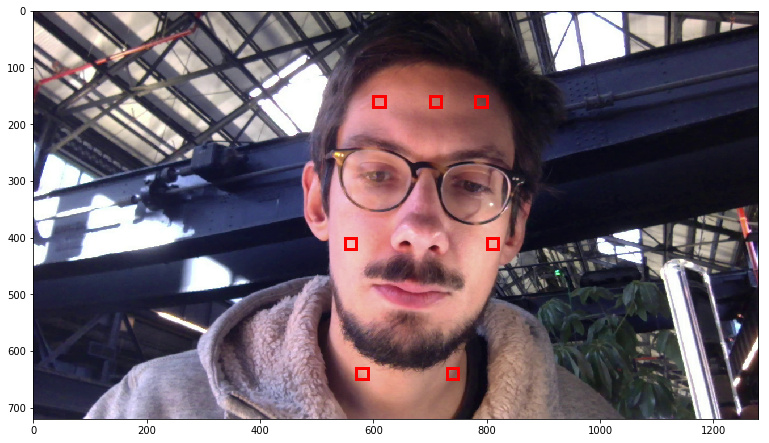

In [4]:
scale = 13
w, h = 20, 20
positions = [(600, 150 ), (700, 150), (780, 150),
            (550, 400), (800, 400),
            (570, 630), (730, 630)]
plt.figure(figsize=(scale, scale * 1280/720))
plt.imshow(array)
for xy in positions:
    plt.gca().add_patch(plt.Rectangle(xy, w, h, fill=False, edgecolor='r', linewidth=3))

In [6]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False, device='cpu')

In [18]:
landmarks = fa.get_landmarks(array)

In [14]:
landmarks[0][:]

array([[ 520.,  282.],
       [ 514.,  343.],
       [ 520.,  386.],
       [ 520.,  434.],
       [ 526.,  483.],
       [ 551.,  532.],
       [ 569.,  562.],
       [ 599.,  581.],
       [ 648.,  611.],
       [ 703.,  605.],
       [ 740.,  587.],
       [ 764.,  562.],
       [ 794.,  520.],
       [ 813.,  471.],
       [ 825.,  428.],
       [ 843.,  380.],
       [ 843.,  331.],
       [ 557.,  233.],
       [ 581.,  221.],
       [ 606.,  221.],
       [ 630.,  227.],
       [ 654.,  239.],
       [ 746.,  252.],
       [ 770.,  246.],
       [ 794.,  239.],
       [ 819.,  246.],
       [ 837.,  264.],
       [ 691.,  306.],
       [ 685.,  343.],
       [ 685.,  380.],
       [ 679.,  404.],
       [ 648.,  422.],
       [ 660.,  428.],
       [ 679.,  434.],
       [ 697.,  434.],
       [ 709.,  434.],
       [ 587.,  288.],
       [ 606.,  282.],
       [ 624.,  288.],
       [ 642.,  300.],
       [ 624.,  300.],
       [ 599.,  300.],
       [ 733.,  306.],
       [ 75

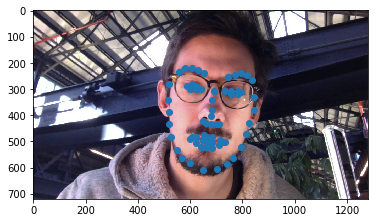

In [17]:
plt.imshow(array)
plt.scatter(landmarks[0][:, 0], landmarks[0][:, 1])

In [77]:
result_dict = {}
for x, y in positions:
    result_dict[str(x)+ "," + str(y)] = []

In [78]:
for i, frame in enumerate(container.decode(video=0)):
    
    np_frame = frame.to_ndarray(format='rgb24')
    for x,y in positions:
        frame = np_frame[y:(y+w), x:(x+h), 1]
        result_dict[str(x)+","+str(y)].append(np.mean(frame))
        


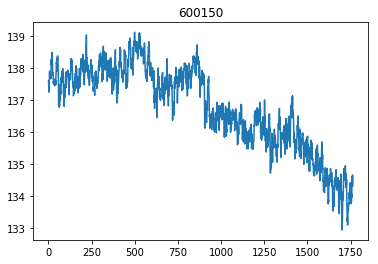

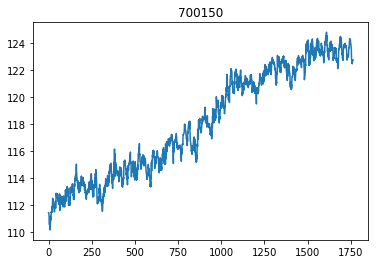

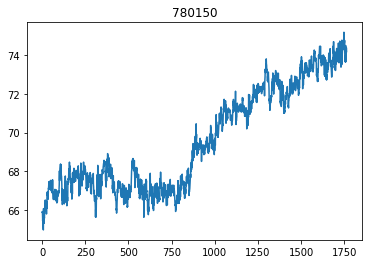

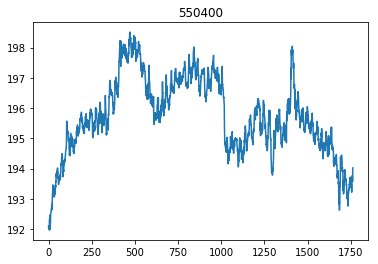

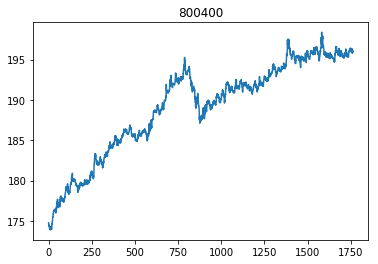

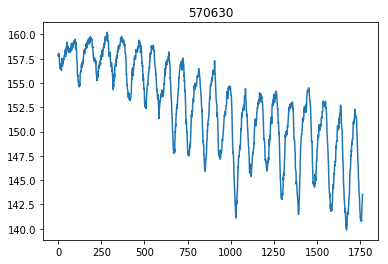

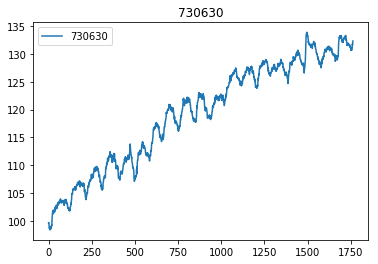

In [79]:
for x,y in positions:
    plt.figure()
    plt.title(str(x) + str(y))
    plt.plot(result_dict[str(x) + ',' + str(y)], label = str(x) + str(y))

plt.legend()

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(ordr, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y



In [ ]:
keys = [str(x) +',' + str(y) for (x,y) in positions ]

In [ ]:
signals = [v for k,v in result_dict.items()]

In [ ]:
signals = np.array(signals)

In [ ]:
x = signals[0, :]
x = x - x[0]

In [ ]:
plt.plot(x)

In [ ]:
# admissible heart rates: 30 - 220 bpm = .5 - 3.5 Hz 
# admissible BF: 10 - 60 bpm: .1 - 1 Hz

In [ ]:
def get_rates(signal, low_cutoff, hi_cutoff, sampling_f):
    signal = signal - signal[0]
    y = butter_bandpass_filter(signal, low_cutoff, hi_cutoff, sampling_f)
    f, Pxx_spec = scipy.signal.welch(y, sampling_f, nperseg=800)
    rate = f[np.argmax(Pxx_spec)]
    return rate * 60

In [ ]:
for i, s in enumerate(signals):
    print("for signal " + str(i) + ":")
    ## HR
    hr = get_rates(s, .5, 3.5, 30)
    print("HR is :" + str(hr))
    br = get_rates(s, .2, 1, 30)
    print("Breathing Rate is :" + str(br))

In [ ]:
s = signals[5]
plt.plot(s)

In [ ]:
y = butter_bandpass_filter(s - s[0], .5, 2, 30)

In [ ]:
plt.plot(y)
plt.plot(s-s[5])

In [ ]:
f, Pxx_spec = scipy.signal.welch(s, 30, nperseg=1000, detrend='linear')

In [ ]:
breathing_freq = f[np.argmax(Pxx_spec)]
breathing_freq, breathing_freq * 60

In [ ]:
plt.plot(f, np.sqrt(Pxx_spec))
plt.xlim([0, 2])

In [ ]:
for i, s in enumerate(signals):
    f, Pxx_spec = scipy.signal.welch(s-s[0], 30, nperseg=1024)
    plt.plot(f, np.sqrt(Pxx_spec), label=str(i))
    plt.ylim([0, 7])
    plt.xlim([0.0, 1.5])
    plt.xlabel('frequency [Hz]')
    
plt.legend()

In [ ]:
breathing_freq = f[np.argmax(Pxx_spec)]
breathing_freq

In [ ]:
# breathing per minute
breathing_freq * 60

In [ ]:
## same exercise for bpm

In [ ]:
y = butter_bandpass_filter(x, .5, 3.5, 30)
plt.plot(y)

In [ ]:
f, Pxx_spec = scipy.signal.periodogram(y, 30, 'flattop', scaling='spectrum')

In [ ]:
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.ylim([1e-4, 1e1])
plt.xlabel('frequency [Hz]')

In [ ]:
hr = f[np.argmax(Pxx_spec)]

In [ ]:
# hr per minute
hr * 60

In [21]:
## watch a little subvideo
container = av.open('test6.avi', mode='w')
stream = container.add_stream('mpeg4', rate=30)
stream.width = 1280
stream.height = 720
#stream.pix_fmt = 'yuv420p'

UnknownCodecError: avi

In [65]:
source_container = av.open('../data/myface.mov')
source_images = []
for frame_i in source_container.decode(video=0):

    np_frame = frame_i.to_ndarray(format='rgb24')
    img = np.zeros((120, 120, 3))
    
    for x,y in positions:
        img[0:20, 0:20, :] = np_frame[y:(y+20), x:(x+20), 1].reshape(20, 20, 1)
        break
    source_images.append(img.astype(np.uint8))

In [66]:
container = av.open('rea32.mp4', mode='w')
stream = container.add_stream('mpeg4', rate=30)
stream.width = 120
stream.height = 120
#stream.pix_fmt = 'yuv420p'

In [67]:
len(source_images)

1765

In [68]:
for frame_i in range(len(source_images)):


    new_frame = av.VideoFrame.from_ndarray(source_images[frame_i])
    for packet in stream.encode(new_frame):
        container.mux(packet)

# Flush stream
for packet in stream.encode():
    container.mux(packet)

# Close the file
container.close()

too many threads/slices (9), reducing to 8
Using AVStream.codec to pass codec parameters to muxers is deprecated, use AVStream.codecpar instead.


In [69]:
container.close()

In [70]:
source_images[0]

array([[[136, 136, 136],
        [136, 136, 136],
        [135, 135, 135],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[137, 137, 137],
        [137, 137, 137],
        [136, 136, 136],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[135, 135, 135],
        [137, 137, 137],
        [139, 139, 139],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ..., 
       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,